# Extra Tree Regression

Extremely Randomized Trees (or Extra-Trees) is an ensemble learning method. The method creates extra trees randomly in sub-samples of datasets to improve the predictivity of the model. By this approach, the method reduces the variance. The method averages the outputs from the decision trees.

In [6]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [7]:
boston = load_boston()
x, y = boston.data, boston.target
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.15)

c:\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :fun

In [8]:
etr = ExtraTreesRegressor()
etr

ExtraTreesRegressor()

In [9]:
etr.fit(xtrain, ytrain)
score = etr.score(xtrain, ytrain)
score

1.0

In [10]:
cv_scores = cross_val_score(etr, xtrain, ytrain, cv=10)
cv_scores.mean()

0.8843775207518659

In [11]:
ypred = etr.predict(xtest)
mse = mean_squared_error(ytest, ypred)
mse

10.530053710526316

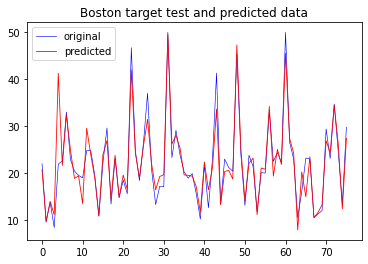

In [12]:
x_ax = range(len(ytest))
plt.plot(x_ax, ytest, lw=0.6, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.title("Boston target test and predicted data")
plt.legend()
plt.show()